<img
src="http://www.telecom-em.eu/sites/default/files/logoimt2016.JPG"
WIDTH=180 HEIGHT=180>

<CENTER>
</br>
<p><font size="5">  TAF MCE - Machine Learning  </font></p>
<p><font size="5">  Kernel methods: statement  </font></p>
</p>
</CENTER>

----------------------------

## I - Kernel density estimation

> 1. Implement the kernel density estimator with a Gaussian kernel in a function **kde(x,data=data,h=0)** where $x$ represents the locations where the density estimator is computed, $data$ the data and $h$ the bandwidth. For default value $h=0$ the bandwidth should be changed inside the function to the standard Sylverman bandwidth estimator. 
> 2. For $n=100$ samples of a $\mathcal{N}(1,1)$ distribution, plot the pdf and its estimator. 
> 3. Check the influence of the value of the bandwidth parameter.
<!--Use bandwidth parameter suggested in (https://en.wikipedia.org/wiki/Kernel_density_estimation).--> 

In [1]:
import numpy as np
import seaborn as sns
from numpy import linalg as LA
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import neighbors
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KernelDensity
from sklearn.neighbors import NearestNeighbors
import scipy.stats as st

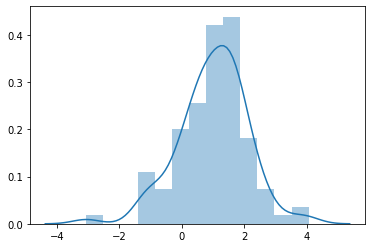

In [2]:
"""from pylab import *
%matplotlib inline"""
value = np.random.normal(loc=1,scale=1,size=100)
sns.distplot(value)

In [3]:
def kernel_gaussian(x):
    return np.exp(-(x**2)/2)/(np.sqrt(2*np.pi))

def kde(x,data,h=0):
        res = 0
        for i in data:
            res += kernel_gaussian((x-i)/h)
        return res/(data.size*h)

The value of h is 0.5093221899789258


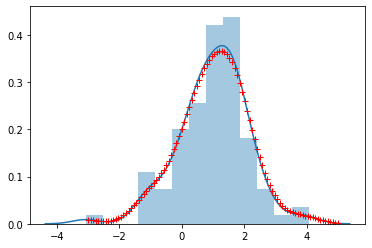

In [4]:
x = np.linspace(-3, 5, 100)
std_statixtic = LA.norm(value-np.mean(value))**2/value.size
h = 1.06*((value.size)**(-1/5))*std_statixtic
print("The value of h is",h)
y = kde(x,value, h)
sns.distplot(value)
plt.plot(x,y, 'r+' )

The value of h is 0.05


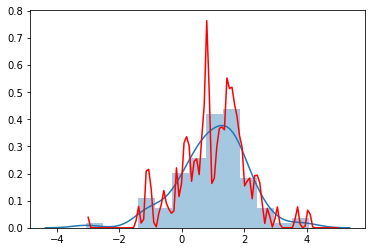

In [5]:
print("The value of h is 0.05")
y = kde(x,value, 0.05)
sns.distplot(value)
plt.plot(x,y, 'r' )

The value of h is 4


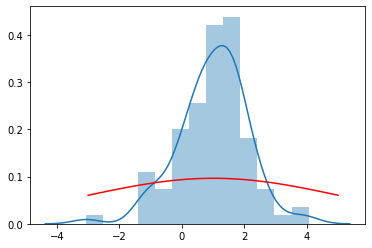

In [6]:
print("The value of h is 4")
y = kde(x,value, 4)
sns.distplot(value)
plt.plot(x,y, 'r' )

## II - Kernel regression

Assume a pair $(X,Y)$ of random variables, with $p(x)\sim\mathcal{U}_{[-3,3]}$ and $p(y\vert x)\sim\mathcal{N}(x^2+\exp(-x),10\cos^2x)$. 

> Implement the kernel approximation of the regression curve $\mathbb{E}[Y\vert X=x]$ and of linear regression. Test your code with sample size $n=10^4$.

100%|██████████| 10000/10000 [00:00<00:00, 65030.99it/s]


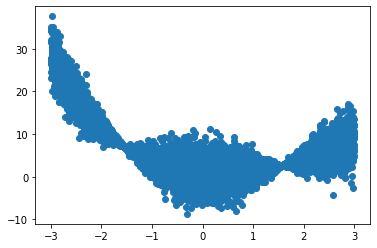

In [7]:
"""from pylab import *
%matplotlib inline"""
n = int(1e4)
x = np.random.uniform(-3,3,n)
y =[]
for i in tqdm(x):
    y.append(np.random.normal(loc=i**2+np.exp(-i),scale=np.sqrt(10)*abs((np.cos(i))),size=1)[0])
y = np.array(y)
plt.scatter(x,y) 

In [8]:
def expY(x_v, data_x, data_y):
    std_x = LA.norm(data_x-np.mean(data_x))**2/data_x.size
    h = 1.06*((data_x.size)**(-1/5))*std_x
    resN = np.zeros(x_v.shape)
    resD = np.zeros(x_v.shape)
    
    for m,n in tqdm(zip(data_x, data_y)):
        resD+=kernel_gaussian((x_v-m)/h)   
        resN+=n*kernel_gaussian((x_v-m)/h)
    return resN/resD  
    

In [9]:
y_pred = expY(x, x, y)

10000it [00:04, 2078.47it/s]


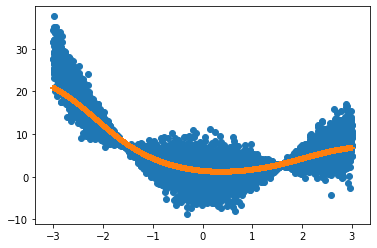

In [10]:
plt.scatter(x,y) 
plt.scatter(x,y_pred,marker='+')

## III - KNN

We consider 2D data generated using the code below. Each line of dataX and dataY represents points form a distinct class

    ns  = 200  # number of samples per class
    nc = 3    # number of classes
    dataX  = zeros(shape=(nc,ns))
    dataY  = zeros(shape=(nc,ns))
    dataX[0,:]  = randn(ns)
    dataY[0,:]  = sin(2*dataX[0,:]) + sqrt(.1)*randn(ns)
    dataX[1,:]  = -1 + .5*randn(ns)
    dataY[1,:]  =  1 + .5*randn(ns)
    dataX[2,:]  =  1 + .5*randn(ns)
    dataY[2,:]  = -1 + .5*randn(ns)

> 1. Visualize data and their class using a scatter plot.
> 2. Discretize the area $[-3,3]\times[-3,3]$ with 100 points per axis. For each point, compute the minimum surface $Z_{ij}=S(X_{ij},Y_{ij})$ of the disk that encloses the K nearest neighbors and represent a contour plot of $Z$
> 3. For each point of the surface, compute the posterior probabilities of the classes and plot the posterior probability map for each class. 
> 4. Plot the decision map for the class that supplies the decided class for each point based on posterior probability maximization.


Note: you could alternatively use scikit learn (https://scikit-learn.org/stable/modules/neighbors.html)

In [11]:
ns  = 200  # number of samples per class
nc = 3    # number of classes
dataX  = np.zeros(shape=(nc,ns))
dataY  = np.zeros(shape=(nc,ns))
dataX[0,:]  = np.random.randn(ns)
dataY[0,:]  = np.sin(2*dataX[0,:]) + np.sqrt(.1)*np.random.randn(ns)

dataX[1,:]  = -1 + .5*np.random.randn(ns)
dataY[1,:]  =  1 + .5*np.random.randn(ns)

dataX[2,:]  =  1 + .5*np.random.randn(ns)
dataY[2,:]  = -1 + .5*np.random.randn(ns)


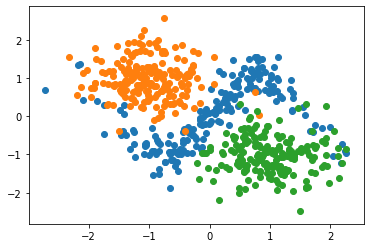

In [12]:
plt.scatter(dataX[0,:],dataY[0,:])
plt.scatter(dataX[1,:],dataY[1,:])
plt.scatter(dataX[2,:],dataY[2,:] )

In [13]:
x0 = np.c_[dataX[0,:], dataY[0,:]]
x1 = np.c_[dataX[1,:], dataY[1,:]]
x2 = np.c_[dataX[2,:], dataY[2,:]]
xMedia = np.concatenate((x0, x1), axis=0)
x = np.concatenate((xMedia, x2), axis=0)
y = np.zeros((600,))
y[200:400] = 1
y[400:] = 2 

In [14]:
def S(X, xx, yy, k):
    origin = 'lower'
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(np.c_[xx.ravel(), yy.ravel()])
    zz = ((distances[:,-1]**2)*np.pi).reshape(xx.shape) 
    fig1, ax2 = plt.subplots(constrained_layout=True)
    CS = ax2.contourf(xx, yy, zz, 35, cmap=plt.cm.jet, origin=origin)
    CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='w', origin=origin)
    cbar = fig1.colorbar(CS)
    cbar.add_lines(CS2)

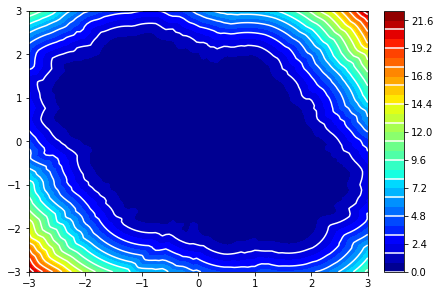

In [15]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 100),np.linspace(-3, 3, 100))
S(x, xx, yy, 4)

In [16]:
def PPM(X, xx, yy, y, k):
    origin = 'lower'
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(np.c_[xx.ravel(), yy.ravel()])
    labels = y[indices]
    zz = np.zeros((10000,3))
    count = 0
    for i in labels:
        i = list(i)
        zz[count,0]= i.count(0.0)/k
        zz[count,1]= i.count(1.0)/k
        zz[count,2]= i.count(2.0)/k
        count+=1
    zz = zz.reshape(xx.shape[0], xx.shape[1], 3)
    fig,(ax1,ax2, ax3)=plt.subplots(1, 3)
    #fig1, ax2 = plt.subplots(2,2,i,constrained_layout=True)
    CS = ax1.contourf(xx, yy, zz[:,:,0], 35, cmap=plt.cm.jet, origin=origin)
    CS2 = ax1.contour(CS, levels=CS.levels[::2], colors='w', origin=origin)
    cbar = fig.colorbar(CS)
    cbar.add_lines(CS2)

    CS = ax2.contourf(xx, yy, zz[:,:,1], 35, cmap=plt.cm.jet, origin=origin)
    CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='w', origin=origin)
    
    CS = ax3.contourf(xx, yy, zz[:,:,2], 35, cmap=plt.cm.jet, origin=origin)
    CS2 = ax3.contour(CS, levels=CS.levels[::2], colors='w', origin=origin)
    return zz

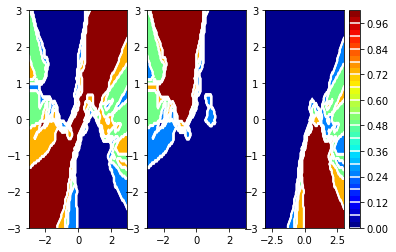

In [17]:
zz = PPM(x, xx, yy, y, 4)

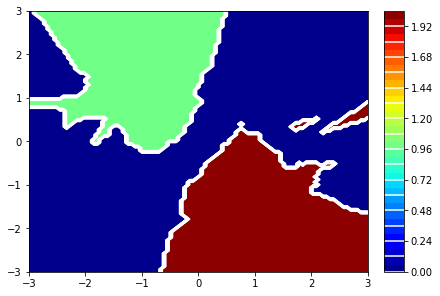

In [18]:
decisionMap = np.argmax(zz, axis=-1)
#print(decisionMap.shape)
#plt.imshow(decisionMap)
#a = np.array([[[0,0,1],[0,1,0]],[[0,1,0],[1,0,0]]])
#print(np.argmax(a, axis=-1))
fig1, ax1 = plt.subplots(constrained_layout=True)
CS = ax1.contourf(xx, yy, decisionMap, 35, cmap=plt.cm.jet, origin='lower')
CS2 = ax1.contour(CS, levels=CS.levels[::2], colors='w', origin='lower')
cbar = fig1.colorbar(CS)
cbar.add_lines(CS2)

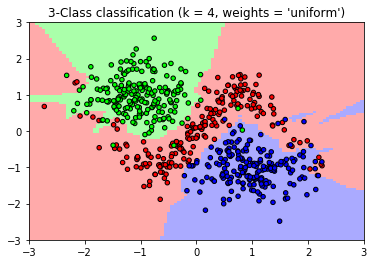

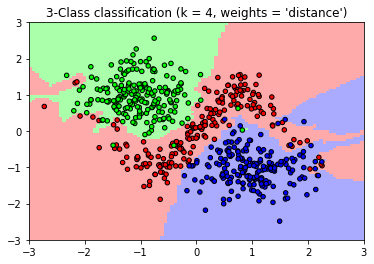

In [19]:
n_neighbors = 4
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(x, y)

    xx, yy = np.meshgrid(np.linspace(-3, 3, 100),
                         np.linspace(-3, 3, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()


## IV - Kernel methods with scikit-learn

We illustrate the use of scikit-learn for kernel density estimation by considering a simple example.

> 1. generate a set of data that contains $2.10^4$ samples with $\mathcal{N}(0,100)$ distribution, $10^4$ samples with $\mathcal{N}(3,1)$ distribution and $10^4$ samples with $\mathcal{N}(2,4)$ distribution.
> 2. Plot the kernel density estimator obtained using the **KernelDensity** function of scikit-learn.


Note that you could also use scikit learn for KNN estimation in setion III (https://scikit-learn.org/stable/modules/neighbors.html)

In [20]:
from pylab import *
%matplotlib inline



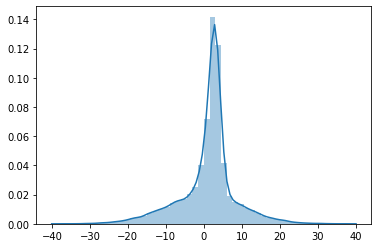

In [21]:
n = 1e4
X = np.concatenate((np.random.normal(0, 10, int(2*n)),np.random.normal(3, 1, int(n))))
X = np.concatenate((X,np.random.normal(2, 2, int(n))))
X = X[:,np.newaxis]
sns.distplot(X)

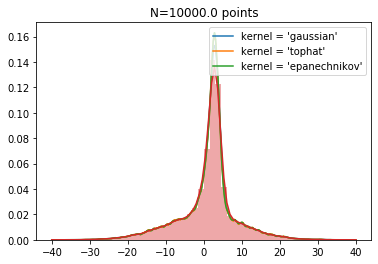

In [22]:
X_plot = np.linspace(-40, 40, n)[:, np.newaxis]


fig, ax = plt.subplots()

for kernel in ['gaussian', 'tophat', 'epanechnikov']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))

ax.set_title( "N={0} points".format(n))

sns.distplot(X)

ax.legend(loc='upper right')

plt.show()